In [1]:
#coding:utf8
import numpy as np
import pandas as pd
import re
import nltk

In [2]:
comments=pd.read_excel("data.xlsx")

In [3]:
comments.head()

,Unnamed: 0,Cümleler,Siber Zorbalıksa 1 Değilse 0
0,0.0,Gençler ayrı bir sempatik olyr deli dolu olyr ...,0
1,1.0,Devlet bunlara bakmıyo sonra biz uğraşıyoruz,1
2,2.0,Atatürk bu adamı görse ağlardı,1
3,3.0,"""Türk milleti zekidir ' derken bundan bahsetmi...",1
4,4.0,"Allah'ım sen bana sabır, bu insanlara da beyin...",1


In [4]:
data = pd.read_excel("data.xlsx",usecols="B,C")
data.head()


,Cümleler,Siber Zorbalıksa 1 Değilse 0
0,Gençler ayrı bir sempatik olyr deli dolu olyr ...,0
1,Devlet bunlara bakmıyo sonra biz uğraşıyoruz,1
2,Atatürk bu adamı görse ağlardı,1
3,"""Türk milleti zekidir ' derken bundan bahsetmi...",1
4,"Allah'ım sen bana sabır, bu insanlara da beyin...",1


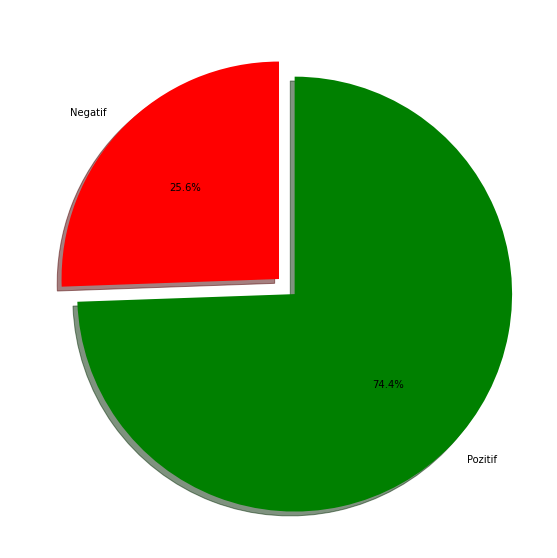

In [5]:
import matplotlib.pyplot as plt
disaster=len(data[data["Siber Zorbalıksa 1 Değilse 0"]==1]['Siber Zorbalıksa 1 Değilse 0'])
not_disaster=len(data[data["Siber Zorbalıksa 1 Değilse 0"]==0]['Siber Zorbalıksa 1 Değilse 0'])
slices = [disaster,not_disaster]
labels = ["Negatif","Pozitif"]
colors =["r","g"]

plt.figure(figsize=(10,10))
plt.pie(slices,
       labels=labels,
       colors=colors,
       startangle=90,
       shadow=True,
       explode=(0,0.1),
       autopct="%1.1f%%")
plt.show()

In [6]:
data.groupby("Siber Zorbalıksa 1 Değilse 0").count()

,Cümleler
Siber Zorbalıksa 1 Değilse 0,
0,8923
1,3064


In [7]:
#from snowballstemmer import TurkishStemmer
#ts=TurkishStemmer()
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [8]:
number=len(comments.index)
number

11987

In [9]:
newComs=[]
for i in range(number):
    comment=re.sub("^[a-zA-Z0-9ğüşöçİĞÜŞÖÇ]+$",' ', comments['Cümleler'][i])
    comment=comment.lower()
    comment=comment.split()
    comment=[word for word in comment if not word in set (stopwords.words('turkish'))]
    comment=' '.join(comment)
    newComs.append(comment)

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='constant')


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(newComs)
X

<11987x30748 sparse matrix of type '<class 'numpy.int64'>'
	with 100897 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer #TF-İDF
tfidf =TfidfTransformer() 
X = tfidf.fit_transform(X).toarray()

print(X.shape)

(11987, 30748)


In [13]:
from sklearn.preprocessing import FunctionTransformer
one_dim = FunctionTransformer(np.reshape, kw_args={'newshape':-1})
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(imp, one_dim, cv)

In [14]:
Y=comments.iloc[:,2].values
Y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=101)


In [16]:

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, [0,1])
    plt.yticks(tick_marks, [0,1])
    plt.tight_layout()
    plt.ylabel('Beklenen Değer')
    plt.xlabel('Tahmin Edilen Değer')

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

Accuracy Score:  0.5821517931609674
Cross Validation Score:  0.6313720362622036
Precision Score:  0.5821517931609674
MCC Score:  0.14253674633998
F1-Score:  0.40850059031877217


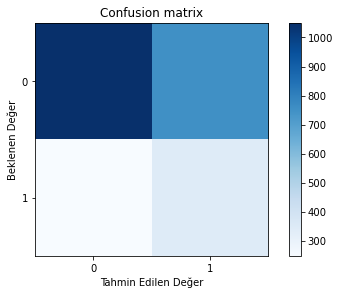

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_m=gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
result =confusion_matrix(np.squeeze(Y_test),np.squeeze(Y_pred))
plot_confusion_matrix(result)
print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))
print('Cross Validation Score: ',cross_val_score(gnb_m, X_test, Y_test, cv = 10).mean())
print('Precision Score: ',precision_score(Y_test, Y_pred,average='micro'))
print('MCC Score: ',matthews_corrcoef(Y_test, Y_pred) )
print('F1-Score: ',f1_score(Y_test, Y_pred))


Accuracy Score:  0.780650542118432
Cross Validation Score:  0.7656433054393306
Precision Score:  0.780650542118432
Recall Score:  0.1414141414141414
MCC Score:  0.2862198180261058
F1-Score:  0.24207492795389046


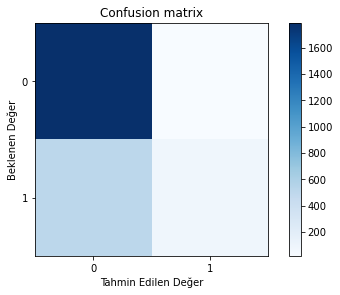

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_m=lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
result =confusion_matrix(np.squeeze(Y_test),np.squeeze(Y_pred))
plot_confusion_matrix(result)
print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))
print('Cross Validation Score: ',cross_val_score(lr_m, X_test, Y_test, cv = 10).mean())
print('Precision Score: ',precision_score(Y_test, Y_pred,average='micro'))
print('Recall Score: ',recall_score(Y_test, Y_pred))
print('MCC Score: ',matthews_corrcoef(Y_test, Y_pred) )
print('F1-Score: ',f1_score(Y_test, Y_pred))

Accuracy Score:  0.7602168473728107
Cross Validation Score:  0.7477122444722569
Precision Score:  0.7602168473728107
Recall Score:  0.36363636363636365
MCC Score:  0.29089239011783824
F1-Score:  0.42899702085402186


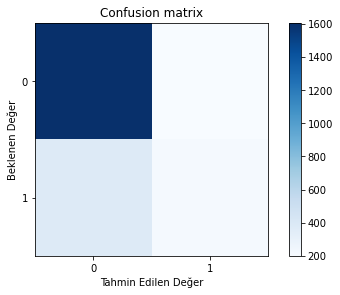

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_m=rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
result =confusion_matrix(np.squeeze(Y_test),np.squeeze(Y_pred))
plot_confusion_matrix(result)
print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))
print('Cross Validation Score: ',cross_val_score(rf_m, X_test, Y_test, cv = 3).mean())
print('Precision Score: ',precision_score(Y_test, Y_pred,average='micro'))
print('Recall Score: ',recall_score(Y_test, Y_pred))
print('MCC Score: ',matthews_corrcoef(Y_test, Y_pred) )
print('F1-Score: ',f1_score(Y_test, Y_pred))